<a href="https://colab.research.google.com/github/araldi/FS22---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L/blob/main/Week9/Classification_part2_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict breast cancer malignancy with supervised learning classification methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_url = 'https://raw.githubusercontent.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/main/Week6/Logistic_regression_data.csv'

breast = pd.read_csv(dataset_url)

In [2]:
breast.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Exploratory data analysis

In [3]:
feature_columns = breast.select_dtypes(exclude = ['int64','object']).columns
features = [i for i in feature_columns if 'Unnamed: 32' not in i]
features = [i.replace(' ', '_') for i in features]

breast.rename(columns = dict(zip(feature_columns, features)), inplace=True)

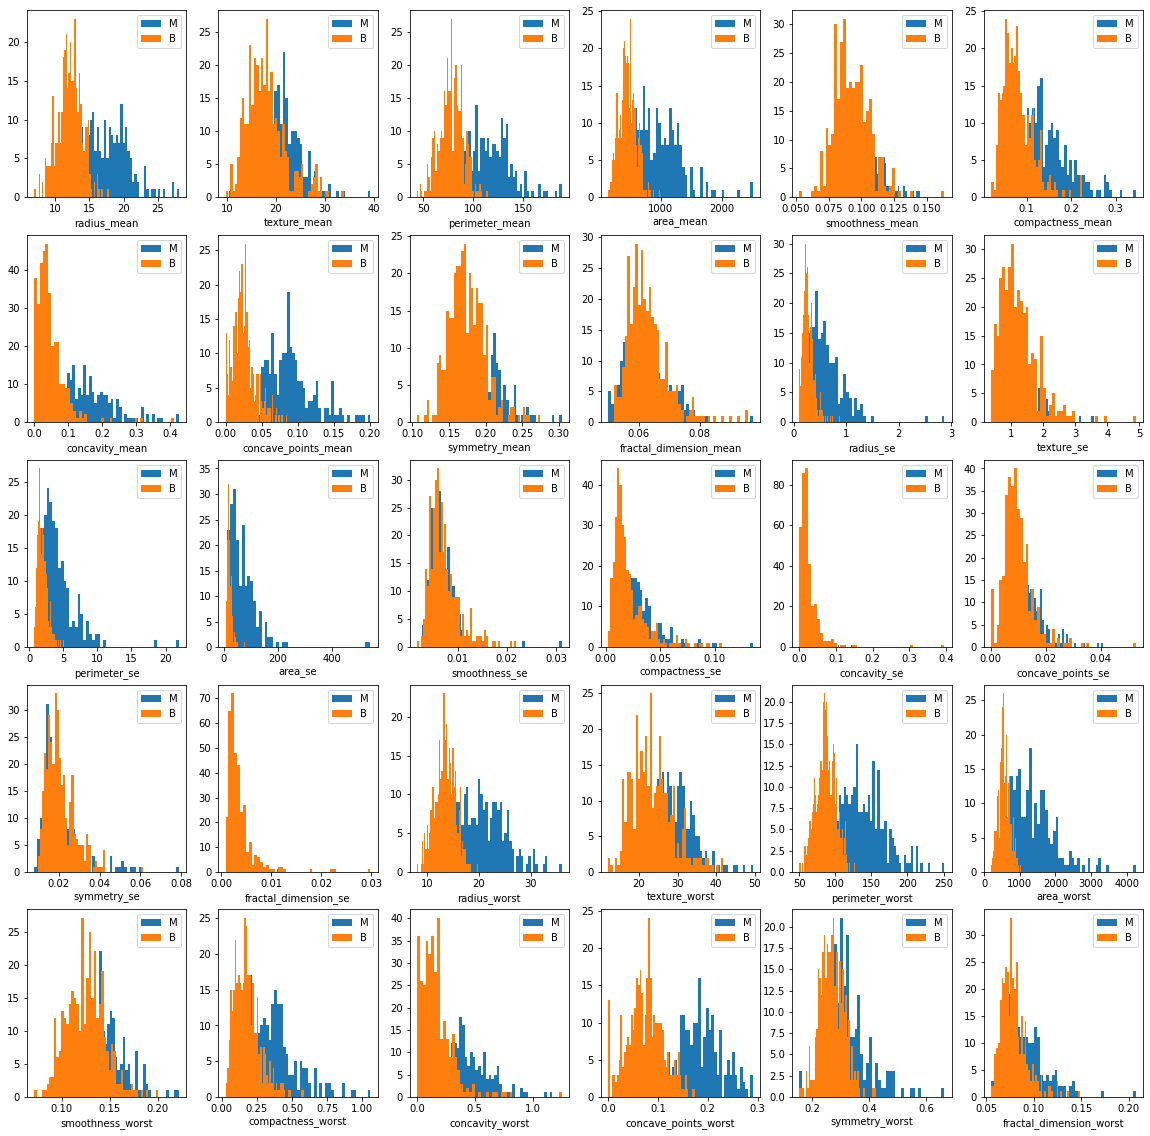

In [4]:
plt.figure(figsize = (20,20))
i=1
for feature in features:
  m = breast['diagnosis'] == 'M'
  b = breast['diagnosis'] == 'B'
  plt.subplot(5,6, i)
  plt.hist(x=feature, data = breast[m], label = 'M', bins = 50)
  plt.hist(x=feature, data = breast[b], label = 'B', bins = 50)
  i = i+1
  plt.xlabel(feature)
  plt.legend()
plt.show()
plt.close()

## Exercise

* Prepare the dataset for machine learning (convert features in binary/continuos, split in train/test set - 25% test)
* Classify malignant or benign breast tumors with Random Forest and Gradient Boosted trees.

* Test different parameters (for Random Forest: criterion, depth, estimators, etc - for Gradient Boosted: loss,  depth, estimators, etc) to determine the best model.

* Determine feature importance
* Predict "malignant" or "benign" in the 25% split test set with the best fitting model.
* Create a confusion matrix for the predictions.


Useful code:
```
def getresults(test,pred_variable):
  precision = metrics.precision_score(test,pred_variable,  pos_label="M", average="binary")
  recall =  metrics.recall_score(test,pred_variable,  pos_label="M", average="binary")
  accuracy = metrics.accuracy_score(test,pred_variable)
  f1 = metrics.f1_score(test,pred_variable,  pos_label="M", average="binary")
  return 'Precision:',precision , 'Recall: ', recall,"Accuracy:", accuracy, "F1:", f1

```




#### Prepare the dataset for CART

In [62]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(breast, test_size=0.25, random_state=2022)

# it does not need scaling!!!

#### Random forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#model 1
rf1 =  RandomForestClassifier(max_depth=3, criterion="gini", n_estimators = 1000, 
                                       random_state=2022).fit(train_df[features].values, 
                                                             train_df["diagnosis"])
print ("score %.2f"%rf1.score(train_df[features].values, train_df["diagnosis"]))

score 0.98


In [65]:
#model 2

rf2 =  RandomForestClassifier(max_depth=None, criterion="gini", n_estimators = 1000,
                                       random_state=2022).fit(train_df[features].values, 
                                                             train_df["diagnosis"])
print ("score %.2f"%rf2.score(train_df[features].values, train_df["diagnosis"]))

score 1.00


Random Forest feature importance
radius_mean 0.04 +/- 0.15
texture_mean 0.01 +/- 0.03
perimeter_mean 0.05 +/- 0.17
area_mean 0.05 +/- 0.16
smoothness_mean 0.0 +/- 0.01
compactness_mean 0.01 +/- 0.06
concavity_mean 0.05 +/- 0.15
concave_points_mean 0.09 +/- 0.23
symmetry_mean 0.0 +/- 0.01
fractal_dimension_mean 0.0 +/- 0.01
radius_se 0.01 +/- 0.07
texture_se 0.0 +/- 0.01
perimeter_se 0.01 +/- 0.07
area_se 0.05 +/- 0.16
smoothness_se 0.0 +/- 0.01
compactness_se 0.0 +/- 0.01
concavity_se 0.0 +/- 0.03
concave_points_se 0.0 +/- 0.02
symmetry_se 0.0 +/- 0.01
fractal_dimension_se 0.0 +/- 0.01
radius_worst 0.11 +/- 0.25
texture_worst 0.01 +/- 0.03
perimeter_worst 0.13 +/- 0.28
area_worst 0.14 +/- 0.28
smoothness_worst 0.01 +/- 0.03
compactness_worst 0.01 +/- 0.06
concavity_worst 0.04 +/- 0.11
concave_points_worst 0.13 +/- 0.26
symmetry_worst 0.01 +/- 0.03
fractal_dimension_worst 0.01 +/- 0.02


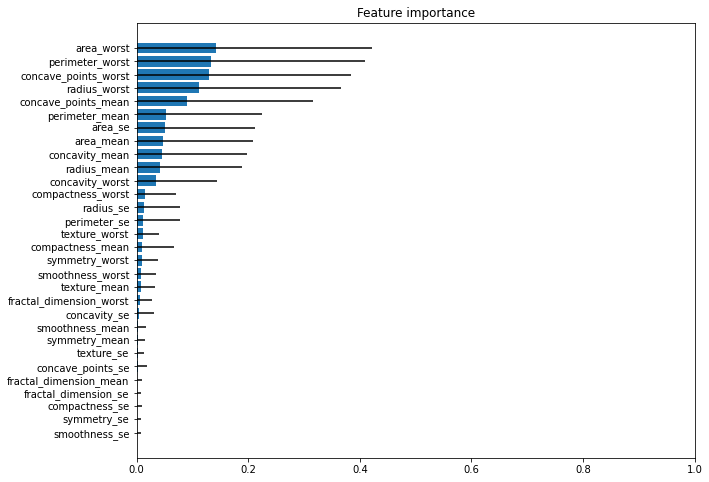

In [66]:
# Compare feature importance in model 1 and 2

# Model 1
fistd = np.std([tree.feature_importances_ for tree in rf1.estimators_],
             axis=0)
print("Random Forest feature importance")
for f, fi, s in zip (train_df[features].columns, rf1.feature_importances_, fistd):
  print (f, fi.round(2), "+/-", s.round(2))


indices = np.argsort(rf1.feature_importances_)
plt.figure(figsize= (10,8))
plt.title("Feature importance")
plt.barh(np.arange(rf1.feature_importances_.shape[0]), 
        rf1.feature_importances_[indices],
       xerr=fistd[indices], align="center")
plt.yticks(range(rf1.feature_importances_.shape[0]), 
          labels=train_df[features].columns[indices])
plt.xlim(0, 1)
plt.show()

Random Forest feature importance
radius_mean 0.04 +/- 0.13
texture_mean 0.01 +/- 0.02
perimeter_mean 0.05 +/- 0.15
area_mean 0.05 +/- 0.14
smoothness_mean 0.01 +/- 0.02
compactness_mean 0.01 +/- 0.05
concavity_mean 0.04 +/- 0.13
concave_points_mean 0.09 +/- 0.2
symmetry_mean 0.0 +/- 0.01
fractal_dimension_mean 0.0 +/- 0.01
radius_se 0.01 +/- 0.06
texture_se 0.01 +/- 0.01
perimeter_se 0.01 +/- 0.06
area_se 0.05 +/- 0.14
smoothness_se 0.0 +/- 0.01
compactness_se 0.0 +/- 0.01
concavity_se 0.01 +/- 0.02
concave_points_se 0.0 +/- 0.02
symmetry_se 0.0 +/- 0.01
fractal_dimension_se 0.0 +/- 0.01
radius_worst 0.11 +/- 0.23
texture_worst 0.02 +/- 0.03
perimeter_worst 0.13 +/- 0.25
area_worst 0.13 +/- 0.25
smoothness_worst 0.01 +/- 0.02
compactness_worst 0.02 +/- 0.05
concavity_worst 0.03 +/- 0.1
concave_points_worst 0.12 +/- 0.23
symmetry_worst 0.01 +/- 0.03
fractal_dimension_worst 0.01 +/- 0.02


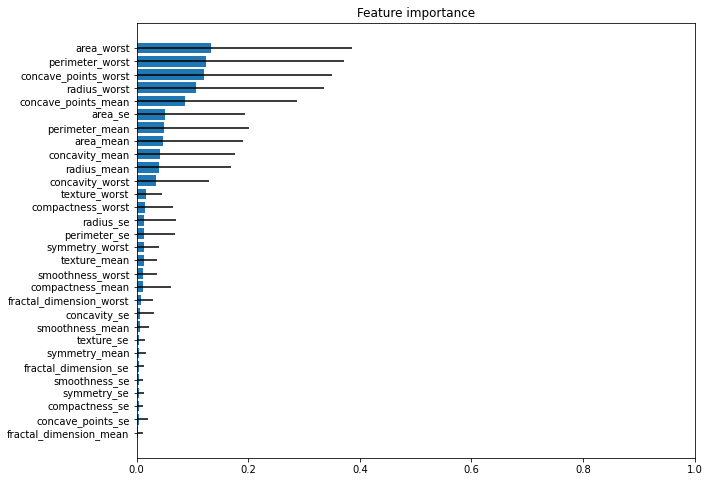

In [67]:
fistd = np.std([tree.feature_importances_ for tree in rf2.estimators_],
             axis=0)
print("Random Forest feature importance")
for f, fi, s in zip (train_df[features].columns, rf2.feature_importances_, fistd):
  print (f, fi.round(2), "+/-", s.round(2))


indices = np.argsort(rf2.feature_importances_)
plt.figure(figsize= (10,8))
plt.title("Feature importance")
plt.barh(np.arange(rf2.feature_importances_.shape[0]), 
        rf2.feature_importances_[indices],
       xerr=fistd[indices], align="center")
plt.yticks(range(rf2.feature_importances_.shape[0]), 
          labels=train_df[features].columns[indices])
plt.xlim(0, 1)
plt.show()

In [68]:
from sklearn import metrics


predicted_classification_model1 = rf1.predict(test_df[features])

predicted_classification_model2 = rf2.predict(test_df[features])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [69]:
def getresults(test,pred_variable):
  precision = metrics.precision_score(test,pred_variable,  pos_label="M", average="binary")
  recall =  metrics.recall_score(test,pred_variable,  pos_label="M", average="binary")
  accuracy = metrics.accuracy_score(test,pred_variable)
  f1 = metrics.f1_score(test,pred_variable,  pos_label="M", average="binary")
  return 'Precision:',precision , 'Recall: ', recall,"Accuracy:", accuracy, "F1:", f1

In [70]:
# model 1
getresults(test_df['diagnosis'].values,predicted_classification_model1)

('Precision:',
 0.9615384615384616,
 'Recall: ',
 0.8928571428571429,
 'Accuracy:',
 0.9440559440559441,
 'F1:',
 0.9259259259259259)

In [71]:
# model 2
getresults(test_df['diagnosis'].values,predicted_classification_model2)

('Precision:',
 0.9622641509433962,
 'Recall: ',
 0.9107142857142857,
 'Accuracy:',
 0.951048951048951,
 'F1:',
 0.9357798165137615)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


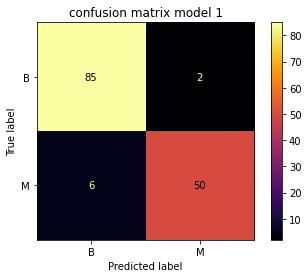

In [72]:
# predict the results with the two models


from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf1,test_df[features], test_df['diagnosis'], cmap='inferno',values_format='g')
plt.title("confusion matrix model 1")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


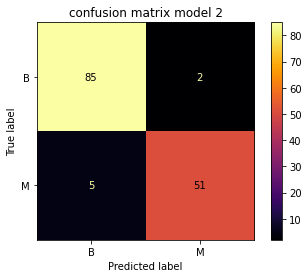

In [73]:
plot_confusion_matrix(rf2,test_df[features], test_df['diagnosis'], cmap='inferno',values_format='g')
plt.title("confusion matrix model 2")
plt.show()

####  Gradient boosted tree

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

gbt =  GradientBoostingClassifier(max_depth=4, 
                                           random_state=2022).fit(train_df[features].values, 
                                                                 train_df['diagnosis'])
print ("score %.2f"%gbt.score(train_df[features].values, train_df['diagnosis']))


score 1.00


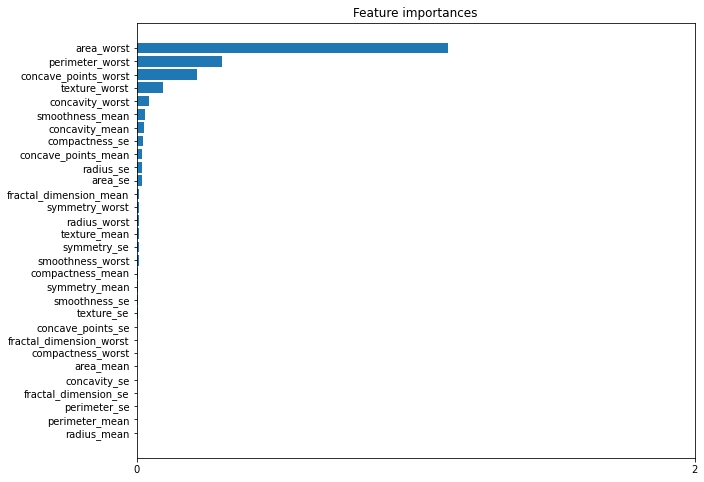

In [39]:
#there is no standard deviation in gradient boosted tree!

indices = np.argsort(gbt.feature_importances_)
plt.figure(figsize= (10,8))

plt.title("Feature importances")
plt.barh(np.arange(gbt.feature_importances_.shape[0]), 
        gbt.feature_importances_[indices])
plt.xticks(range(gbt.feature_importances_.shape[0]), indices)
plt.yticks(range(gbt.feature_importances_.shape[0]), 
          labels = test_df[features].columns[indices])
plt.xlim(0, 1)
plt.show()

In [75]:
# predict
predicted_classification_gbt = gbt.predict(test_df[features])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [76]:
getresults(test_df['diagnosis'].values,predicted_classification_gbt)

('Precision:',
 0.9433962264150944,
 'Recall: ',
 0.8928571428571429,
 'Accuracy:',
 0.9370629370629371,
 'F1:',
 0.9174311926605505)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


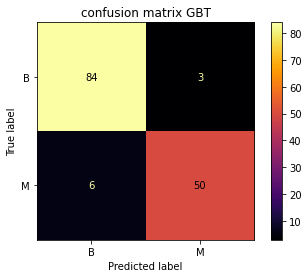

In [77]:
plot_confusion_matrix(gbt,test_df[features], test_df['diagnosis'], cmap='inferno',values_format='g')
plt.title("confusion matrix GBT")
plt.show()

# GridCV: most efficient way to tune hyperparameters

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf =  RandomForestClassifier(random_state=2022)
min_samples_split = [2,3,4]                                      
max_depth=[3,4,5,6,8, None]
criterion= ['gini','entropy']

parameters_rf=dict(min_samples_split=min_samples_split,criterion=criterion,max_depth=max_depth)

#training random forest model, finding best params
gridrf=GridSearchCV(rf,parameters_rf,cv=3, scoring = 'recall')
gridrf.fit(train_df[features],train_df['diagnosis']);

In [89]:
def examinebestmodel(model_name):
    print(model_name.best_score_)
    print(model_name.best_params_)
    print(model_name.best_estimator_)

In [90]:
examinebestmodel(gridrf)

nan
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
RandomForestClassifier(max_depth=3, random_state=2022)


In [81]:
test_prediction_rf=gridrf.best_estimator_.predict(test_df[features])

getresults(test_df['diagnosis'],test_prediction_rf)

('Precision:',
 0.98,
 'Recall: ',
 0.875,
 'Accuracy:',
 0.9440559440559441,
 'F1:',
 0.9245283018867924)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


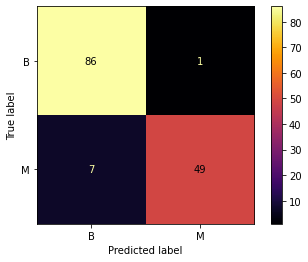

In [82]:
#confusion matrix for rf
plot_confusion_matrix(gridrf.best_estimator_,test_df[features],test_df['diagnosis'],cmap='inferno',values_format='g')
plt.show()

### Gradient Boosting

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbt =  GradientBoostingClassifier()
loss = ['deviance','exponential']                                          
max_depth=[3,4,5,6,8, None]
criterion= ['squared_error','friedman_mse','absolute_error']

parameters_gbt=dict(loss=loss,criterion=criterion,max_depth=max_depth)

#training GBT model, finding best params
gridgbt=GridSearchCV(gbt,parameters_gbt,cv=3, scoring = 'accuracy')
gridgbt.fit(train_df[features],train_df['diagnosis']);

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1290: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1290: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1290: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/p

In [84]:
examinebestmodel(gridgbt)

0.943661971830986
{'criterion': 'squared_error', 'loss': 'exponential', 'max_depth': 3}
GradientBoostingClassifier(criterion='squared_error', loss='exponential')


In [85]:
test_prediction_gbt=gridgbt.best_estimator_.predict(test_df[features])


In [86]:
getresults(test_df['diagnosis'],test_prediction_gbt)

('Precision:',
 0.9615384615384616,
 'Recall: ',
 0.8928571428571429,
 'Accuracy:',
 0.9440559440559441,
 'F1:',
 0.9259259259259259)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


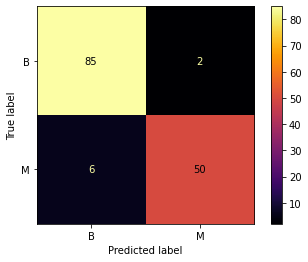

In [87]:
#confusion matrix for gbt
plot_confusion_matrix(gridgbt.best_estimator_,test_df[features],test_df['diagnosis'],cmap='inferno',values_format='g')
plt.show()

# K-NN classifier

In this example, we will use GridSearchCV to find the best hyperparameters for the model

In [91]:
breast[features]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Divide train/test and scale 

In [93]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(breast, test_size=0.25, random_state=2022)


scaler = preprocessing.StandardScaler()
train_df[features]=scaler.fit_transform(train_df[features])
test_df[features]=scaler.fit_transform(test_df[features])


In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

knn = KNeighborsClassifier()
neighbors=[3,5,9,13]
metric=['manhattan','euclidean', 'chebyshev']
algorithm=['ball_tree', 'brute','auto', 'kd_tree']
parameters_knn=dict(n_neighbors=neighbors,metric=metric,algorithm=algorithm)


#training KNN model, finding best params
gridknn=GridSearchCV(knn,parameters_knn,cv=3,verbose=1, scoring = 'accuracy')
gridknn.fit(train_df[features],train_df['diagnosis'])

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'brute', 'auto', 'kd_tree'],
                         'metric': ['manhattan', 'euclidean', 'chebyshev'],
                         'n_neighbors': [3, 5, 9, 13]},
             scoring='accuracy', verbose=1)

In [101]:
examinebestmodel(gridknn)

nan
{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 3}
KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=3)


In [96]:
#predicting on test set
test_prediction_knn=gridknn.best_estimator_.predict(test_df[features])
getresults(test_df['diagnosis'],test_prediction_knn)

('Precision:',
 1.0,
 'Recall: ',
 0.9285714285714286,
 'Accuracy:',
 0.972027972027972,
 'F1:',
 0.962962962962963)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


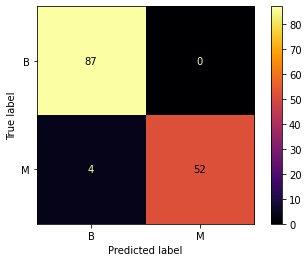

In [97]:
from sklearn.metrics import plot_confusion_matrix

#confusion matrix for KNN 
plot_confusion_matrix(gridknn.best_estimator_,test_df[features],test_df['diagnosis'],cmap='inferno',values_format='g')
plt.show()

# SVM

In [107]:
from sklearn.svm import SVC

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

svm_model= SVC()
parameters_SVC = {
 'C': [1, 10,100], 'kernel': ['linear','rbf','sigmoid', 'poly'], 
 'gamma': [1,0.01, 0.0001]}


# C is the regularization parameter:
#  large C will find a hyperplane with smaller margins (= more segmentations, therefore better fit)

# gamma is how far the influence of a single training example reaches
# high gamma: points close to plausible line are considered in calculation
# low gamma: points far away from plausible seperation line are considered in calculation for the separation line
model_svm = GridSearchCV(svm_model, parameters_SVC,cv=2, scoring = 'accuracy')
model_svm.fit(train_df[features],train_df['diagnosis'])



GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.01, 0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             scoring='accuracy')

In [108]:
examinebestmodel(model_svm)

0.9671361502347418
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001)


In [109]:
#predicting on test set
test_prediction_svm=model_svm.best_estimator_.predict(test_df[features])
getresults(test_df['diagnosis'],test_prediction_svm)

('Precision:',
 1.0,
 'Recall: ',
 0.875,
 'Accuracy:',
 0.951048951048951,
 'F1:',
 0.9333333333333333)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


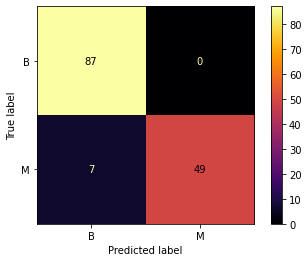

In [110]:
#confusion matrix for svm
plot_confusion_matrix(model_svm.best_estimator_,test_df[features],test_df['diagnosis'],cmap='inferno',values_format='g')
plt.show()